# Face Detection w/ RetinaFace

pretrained model: retinaface-r50: medium size model with ResNet50 backbone. 
It can output face bounding boxes and five facial landmarks in a single forward pass.

WiderFace validation mAP: Easy 96.5, Medium 95.6, Hard 90.4.

**`RetinaFace-R50**
- WiderFace로 이미 사전학습이 왼료된 모델
    - WiderFace validation mAP: Easy 96.5, Medium 95.6, Hard 90.4.
- ResNet50 backbone
- bounding box + landmark(5개) 검출

In [1]:
from retinaface import RetinaFace

2025-11-17 13:42:06.081627: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
resp = RetinaFace.detect_faces("./data/hiking.jpg")

25-11-17 13:43:49 - Directory /Users/yunha_hwa_ng/.deepface created
25-11-17 13:43:49 - Directory /Users/yunha_hwa_ng/.deepface/weights created
25-11-17 13:43:49 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /Users/yunha_hwa_ng/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:06<00:00, 19.3MB/s] 


In [3]:
resp

{'face_1': {'score': 0.9994792342185974,
  'facial_area': [744, 509, 767, 540],
  'landmarks': {'right_eye': [754.8187, 524.9826],
   'left_eye': [764.1219, 524.0567],
   'nose': [761.4319, 530.9929],
   'mouth_right': [755.31964, 534.61993],
   'mouth_left': [762.46606, 534.1979]}},
 'face_2': {'score': 0.9992612600326538,
  'facial_area': [549, 554, 568, 578],
  'landmarks': {'right_eye': [553.7805, 564.10693],
   'left_eye': [561.9801, 564.11224],
   'nose': [557.6125, 568.5967],
   'mouth_right': [554.54694, 572.72284],
   'mouth_left': [561.3509, 572.7408]}},
 'face_3': {'score': 0.9986755847930908,
  'facial_area': [274, 392, 310, 443],
  'landmarks': {'right_eye': [299.49393, 412.81927],
   'left_eye': [305.05115, 410.92474],
   'nose': [309.7574, 421.3449],
   'mouth_right': [300.23, 431.07953],
   'mouth_left': [304.5585, 430.4293]}},
 'face_4': {'score': 0.998538076877594,
  'facial_area': [651, 567, 668, 590],
  'landmarks': {'right_eye': [654.7034, 576.8068],
   'left_eye':

In [5]:
from retinaface import RetinaFace
import cv2
import matplotlib.pyplot as plt

# 1) 이미지 불러오기
img_path = "./data/hiking.jpg"   # 테스트할 이미지 이름
img = cv2.imread(img_path)

# 2) 얼굴 검출
faces = RetinaFace.detect_faces(img_path)

print(faces)

{'face_1': {'score': 0.9994792342185974, 'facial_area': [744, 509, 767, 540], 'landmarks': {'right_eye': [754.8187, 524.9826], 'left_eye': [764.1219, 524.0567], 'nose': [761.4319, 530.9929], 'mouth_right': [755.31964, 534.61993], 'mouth_left': [762.46606, 534.1979]}}, 'face_2': {'score': 0.9992612600326538, 'facial_area': [549, 554, 568, 578], 'landmarks': {'right_eye': [553.7805, 564.10693], 'left_eye': [561.9801, 564.11224], 'nose': [557.6125, 568.5967], 'mouth_right': [554.54694, 572.72284], 'mouth_left': [561.3509, 572.7408]}}, 'face_3': {'score': 0.9986755847930908, 'facial_area': [274, 392, 310, 443], 'landmarks': {'right_eye': [299.49393, 412.81927], 'left_eye': [305.05115, 410.92474], 'nose': [309.7574, 421.3449], 'mouth_right': [300.23, 431.07953], 'mouth_left': [304.5585, 430.4293]}}, 'face_4': {'score': 0.998538076877594, 'facial_area': [651, 567, 668, 590], 'landmarks': {'right_eye': [654.7034, 576.8068], 'left_eye': [662.3359, 576.6453], 'nose': [657.7526, 580.7472], 'mout

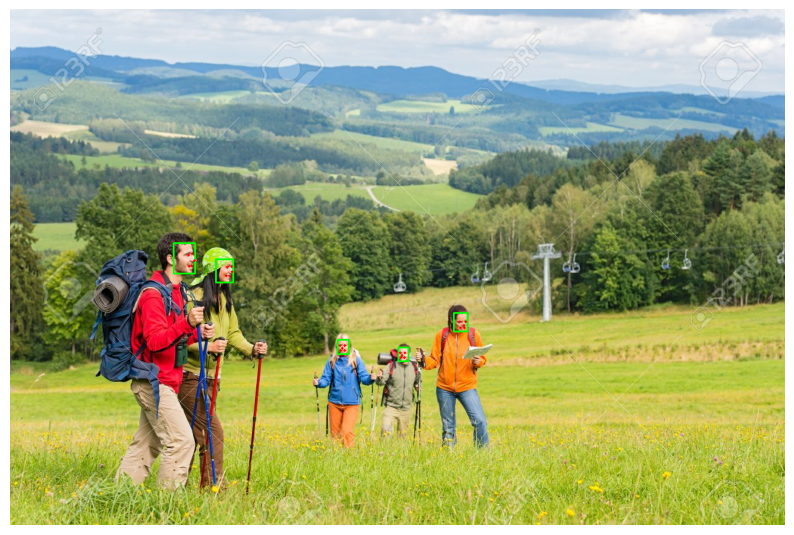

In [6]:
# 3) bounding box 및 랜드마크 그리기
img_draw = img.copy()

for key in faces.keys():
    face = faces[key]
    bbox = face["facial_area"]
    landmarks = face["landmarks"]

    # draw bbox
    cv2.rectangle(
        img_draw,
        (bbox[0], bbox[1]),
        (bbox[2], bbox[3]),
        (0, 255, 0), 2
    )

    # draw landmarks
    for name, point in landmarks.items():
        cv2.circle(img_draw, (int(point[0]), int(point[1])), 2, (0,0,255), -1)

# 시각화
img_draw_rgb = cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img_draw_rgb)
plt.axis("off")
plt.show()


# Face Recognition w/ ArcFace

In [ ]:
from deepface import DeepFace
hani = './data/hani.jpg'
newjeans = './data/newjeans.jpg'
DeepFace.verify(img1_path=hani, img2_path=newjeans, model_name='ArcFace', detector_backend='retinaface')

25-11-17 14:37:06 - 🔗 arcface_weights.h5 will be downloaded from https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5 to /Users/yunha_hwa_ng/.deepface/weights/arcface_weights.h5...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: /Users/yunha_hwa_ng/.deepface/weights/arcface_weights.h5
 16%|█▋        | 22.5M/137M [00:04<00:17, 6.43MB/s]